In [54]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [55]:
## import timeseries data
data = pd.read_csv('exchange-rate-twi.csv')

data.columns = ['Month', 'Passengers']
# data['Month'] = pd.to_datetime(data['Month'], format = '%m')
data = data.set_index('Month')

In [56]:
data.head(12)

,Passengers
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
6,99.2
7,99.2
8,99.3
9,100.0


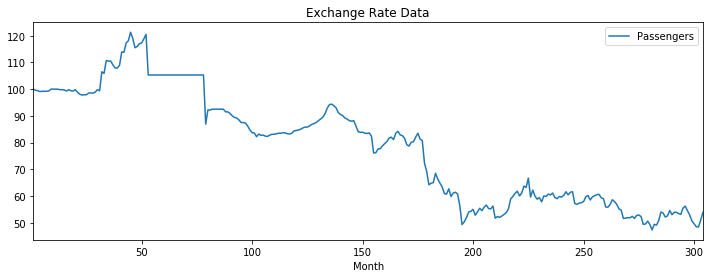

In [57]:
# Time series analysis
# Plot timeseries data

data.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Exchange Rate Data')
plt.show(block  = False)

#### Missing Value Treatment

In [45]:
# Mean Imputation
data = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))

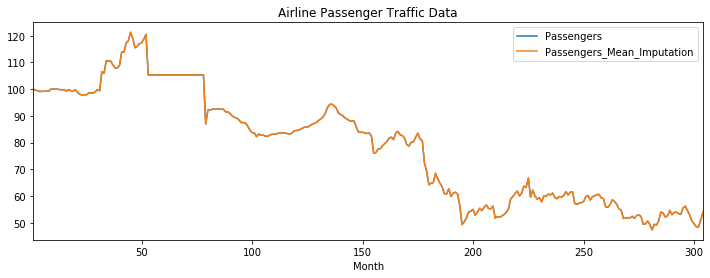

In [46]:
# Time series analysis
# Plot timeseries data

data.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show(block  = False)

## Linear Interpolation

In [47]:
# Mean Imputation
data = data.assign(Passengers_Mean_Interpolation = data.Passengers.interpolate( method = 'linear'))

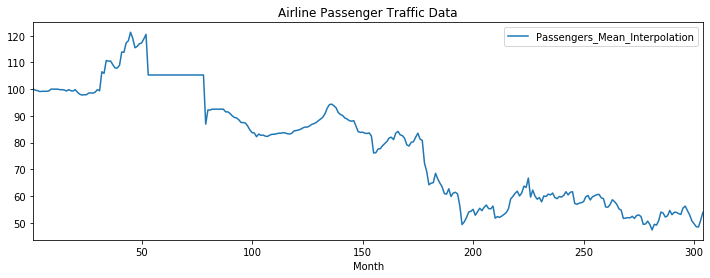

In [48]:
# Time series analysis
# Plot timeseries data

data[['Passengers_Mean_Interpolation']].plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show(block  = False)

In [49]:
data['Passengers'] = data['Passengers_Mean_Interpolation']

## Outlier Detection

In [50]:
import seaborn as sns

### Boxplot

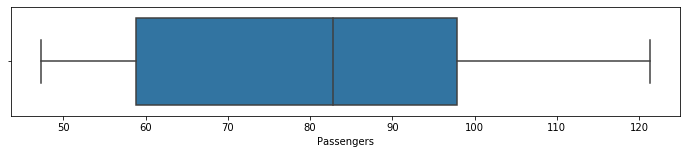

In [51]:
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot( x = data['Passengers'], whis = 1.5)

### Histogram

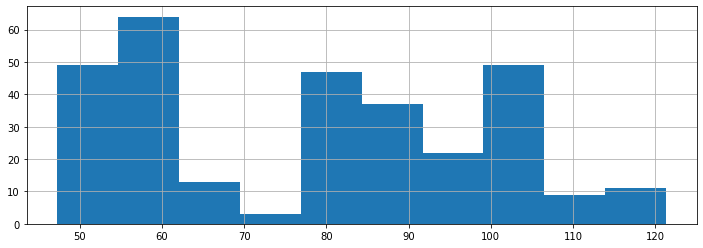

In [52]:
fig = data.Passengers.hist(figsize = (12,4))

### Timeseries Decomposition

In [53]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'additive')

fig = decompostion.plot()
plt.show()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

### multiplicative Timeseries Decomposition

In [ ]:
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'multiplicative')

fig = decompostion.plot()
plt.show()

## Build and evaluate Timeseries forecasting

In [ ]:
## Splitting timeseries into test and train data

train_len = 212
train = data[0:train_len]
test = data[train_len:]

In [ ]:
train.tail()

In [ ]:
### Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [ ]:
y_hat_naive.head()

#### Plot train, test and forecast

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label ='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Simple Average Method

In [ ]:
train['Passengers'].mean()

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [ ]:
y_hat_avg.head()

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label ='Simple Average forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

## Calculate RMSE and MAPE values

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method' : ['Naive method'], 'MAPE':[mape], 'RMSE':[rmse] })
results = results[['Method', 'RMSE', 'MAPE']]
results

### Calculate RMSE and MAPE to evaluate forecast

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_avg['avg_forecast']) / test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple average method'], 'RMSE': [rmse], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Machine Learning II > Module 9 > Session 2

In [58]:
train_len = 213

In [75]:
y_hat_sma = data.copy()

ma_window = 6

y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len - 1]

Text(0.5, 1.0, 'Simple Moving Average Method')

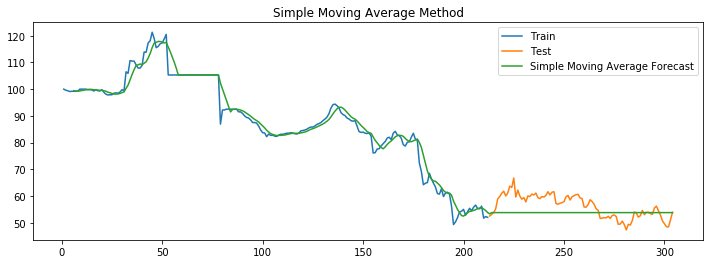

In [76]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple Moving Average Forecast')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')

In [77]:
train_len = 213

In [78]:
y_hat_sma.tail()

,Passengers,sma_forecast
Month,,
300,49.6,53.783333
301,48.5,53.783333
302,48.4,53.783333
303,51.0,53.783333
304,53.9,53.783333


In [67]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
# mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'][train_len:]) / test['Passengers'])*100, 2)

ValueError: Found input variables with inconsistent numbers of samples: [92, 91]

In [79]:
tempResults = pd.DataFrame({'Method' : ['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape], })

In [80]:
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11
0,Simple average method,32.42,58.12
0,Simple Moving Average Method,32.42,6.99
0,Simple Moving Average Method,32.42,6.99


In [87]:
test.head()

,Passengers
Month,
213,52.5
214,53.1
215,53.8
216,55.2
217,58.9


In [84]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

Text(0.5, 1.0, 'Simple Exponential Smoothing Method')

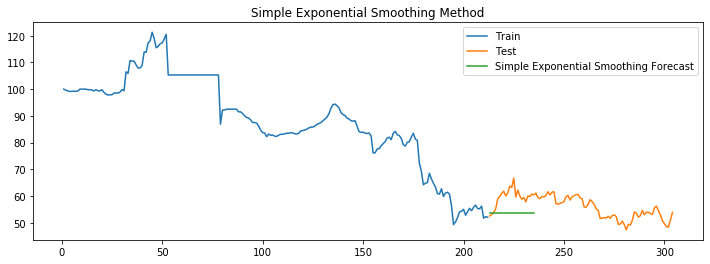

In [85]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'Simple Exponential Smoothing Forecast')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Method')

In [86]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method' : ['Simple exponential smoothing method'], 'MAPE':[mape], 'RMSE':[rmse] })
results = results[['Method', 'RMSE', 'MAPE']]
results

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').